In [39]:
import pandas as pd
import numpy as np

In [40]:
nutrition = pd.read_csv('../data/Nutrition.csv')

In [41]:
nutrition.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [42]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

## Information about data
Each row represents a combination of a year, state, survey question, and percent of individuals who are positively identified for that question, along with stratification. The categories for stratification are Age Range, Education, Gender, Income, Race/Ethnicity, and Total.

This dataset includes observations for the years 2011-2023. Percentages and data are not included for groups with insufficient sample sizes.


In [43]:
nutrition_clean = nutrition.copy()

## Dealing with Missing Values and Similar Columns

Does YearStart always equal YearEnd?

In [68]:
nutrition_clean.loc[nutrition_clean['YearStart'] != nutrition_clean['YearEnd']]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Sample_Size_Insufficient,High_Confidence_Limit


In [44]:
cols_with_nulls = []
for col in nutrition_clean.columns:
    if nutrition_clean[col].isna().sum() > 0:
        cols_with_nulls.append(col)

print(f"Columns with 1 or more missing values:")
for i in cols_with_nulls:
    print(i)


Columns with 1 or more missing values:
Data_Value_Unit
Data_Value
Data_Value_Alt
Data_Value_Footnote_Symbol
Data_Value_Footnote
Low_Confidence_Limit
High_Confidence_Limit 
Sample_Size
Total
Age(years)
Education
Gender
Income
Race/Ethnicity
GeoLocation


### Data_Value_Unit

In [45]:
nutrition_clean.loc[nutrition_clean['Data_Value_Unit'].isna()].head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
88872,2022,2022,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(64.84507995700051, -147.72205903599973)",PA,PA1,Q047,VALUE,2,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
88873,2022,2022,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
88874,2022,2022,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q036,VALUE,2,Education,High school graduate,EDU,EDUHSGRAD
88875,2022,2022,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q036,VALUE,2,Income,"Less than $15,000",INC,INCLESS15
88876,2022,2022,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(64.84507995700051, -147.72205903599973)",PA,PA1,Q047,VALUE,2,Gender,Male,GEN,MALE


In [46]:
nutrition_clean.loc[nutrition_clean['Data_Value_Unit'].isna()]['Question'].unique()

array(['Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a we

In [47]:
nutrition_clean['Data_Value_Unit'].unique()

array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021.,   nan])

The description of the dataset describes `Data_Value_Unit` as "Description of unit e.g. %, etc" but this does not seem accurate, as the non-null values are years. 

In [48]:
nutrition_clean = nutrition_clean.drop(columns=['Data_Value_Unit'])

### Data_Value

In [49]:
print(f'Percent Null: {(nutrition_clean['Data_Value'].isna().sum()/len(nutrition_clean))*100}')

Percent Null: 10.325878471689427


It may be important to keep the null values to show the incompleteness of the data so I'm leaving them for right now. 

### Data_Value_Alt
Description: "Numeric representation of data value"

In [50]:
# How many differences are there between Data_Value and Data_Value_Alt?
(nutrition_clean['Data_Value'] == nutrition_clean['Data_Value_Alt']).value_counts()

True     93505
False    10767
Name: count, dtype: int64

In [51]:
# What do these differences look like
nutrition_clean.loc[(nutrition_clean['Data_Value_Alt'] != nutrition_clean['Data_Value']), ['Data_Value', 'Data_Value_Alt']]

,Data_Value,Data_Value_Alt
9,NaN,NaN
10,NaN,NaN
12,NaN,NaN
18,NaN,NaN
30,NaN,NaN
...,...,...
104233,NaN,NaN
104237,NaN,NaN
104238,NaN,NaN
104248,NaN,NaN


In [52]:
# Are all of them pairs of NaNs?
nutrition_clean.loc[((nutrition_clean['Data_Value_Alt'] != nutrition_clean['Data_Value']) & 
                     (nutrition_clean['Data_Value_Alt'].notna() | nutrition_clean['Data_Value'].notna())), 
                    ['Data_Value', 'Data_Value_Alt']]

,Data_Value,Data_Value_Alt


All of the columns where Data_Value and Data_Value_Alt are not equal are pairs of NaNs (Python doesn't see 2 NaNs as equal). It is reasonable to drop Data_Value_Alt here because it does not add any additional meaning to the data. 

In [53]:
nutrition_clean = nutrition_clean.drop(columns=['Data_Value_Alt'])

### Data_Value_Footnote and Data_Value_Footnote_Symbol

In [54]:
# What values are present in these columns?
print('Data_Value_Footnote:')
print(nutrition_clean['Data_Value_Footnote'].unique())
print('\nData_Value_Footnote_Symbol:')
print(nutrition_clean['Data_Value_Footnote_Symbol'].unique())

Data_Value_Footnote:
[nan 'Data not available because sample size is insufficient.']

Data_Value_Footnote_Symbol:
[nan '~']


In [55]:
# Are there any differences between these 2 columns?
(nutrition_clean['Data_Value_Footnote'] == nutrition_clean['Data_Value_Footnote_Symbol']).value_counts()

False    104272
Name: count, dtype: int64

There are no differences between these 2 columns and the column name is not very descriptive of what values are present in the columns. It would make more sense to have a column called "Sample_Size_Insufficient" with binary values. 

In [56]:
nutrition_clean['Sample_Size_Insufficient'] = nutrition_clean["Data_Value_Footnote_Symbol"].map({np.nan:0, '~':1})

In [57]:
nutrition_clean = nutrition_clean.drop(columns=['Data_Value_Footnote', 'Data_Value_Footnote_Symbol'])

### Low_Confidence_Limit and High_Confidence_Limit

In [58]:
# Rename to remove trailing whitespace
nutrition_clean['High_Confidence_Limit'] = nutrition_clean['High_Confidence_Limit ']

In [59]:
# Drop column with extra whitespace
nutrition_clean = nutrition_clean.drop(columns=['High_Confidence_Limit '])

In [60]:
# What do these columns look like?
nutrition_clean.loc[:,['Low_Confidence_Limit','High_Confidence_Limit']]

,Low_Confidence_Limit,High_Confidence_Limit
0,16.1,32.4
1,22.7,50.9
2,19.1,24.6
3,24.5,35.0
4,26.2,41.7
...,...,...
104267,28.5,35.2
104268,30.1,34.7
104269,20.0,25.2
104270,27.5,44.8


In [61]:
# If there's a null in one column, are there nulls in both?
(nutrition_clean['Low_Confidence_Limit'].isna() == nutrition_clean['High_Confidence_Limit'].isna()).value_counts()

True    104272
Name: count, dtype: int64

## Analysis


In [62]:
nutrition_clean['Topic'].unique()

array(['Obesity / Weight Status', 'Physical Activity - Behavior',
       'Fruits and Vegetables - Behavior'], dtype=object)

We are only interested in physical activity

In [ ]:
activity = nutrition_clean.loc[nutrition_clean['Topic'] == 'Physical Activity - Behavior']

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Sample_Size_Insufficient,High_Confidence_Limit
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,21.7,...,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE,0,24.6
6,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,Value,28.8,...,PA1,Q046,VALUE,2,Education,Less than high school,EDU,EDUHS,0,36.8
8,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,Value,35.9,...,PA1,Q046,VALUE,2,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT,0,38.6
9,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,Value,NaN,...,PA1,Q045,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN,1,NaN
12,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,NaN,...,PA1,Q044,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104267,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,31.7,...,PA1,Q047,VALUE,56,Education,High school graduate,EDU,EDUHSGRAD,0,35.2
104268,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,32.4,...,PA1,Q047,VALUE,56,Age (years),65 or older,AGEYR,AGEYR65PLUS,0,34.7
104269,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,22.5,...,PA1,Q047,VALUE,56,Income,Data not reported,INC,INCNR,0,25.2
104270,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,Value,35.6,...,PA1,Q046,VALUE,56,Education,Less than high school,EDU,EDUHS,0,44.8


In [ ]:
activity['Question'].unique()

array(['Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],
      dtype=object)

Research question: Do higher-income populations consistently have more time for physical activity than lower income populations?

Variables of interest:
YearStart, YearEnd, LocationAbbr - denote which study each data point came from
Question - what is being measured
Data_Value - percentage who engage in/achieve the question metric
StratificationCategory1 - only looking at "Income"
Income - shows income

In [ ]:
# filter to only these variables of interest


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Sample_Size_Insufficient,High_Confidence_Limit


In [65]:
test = activity.loc[(activity['Question'] == 'Percent of adults who engage in no leisure-time physical activity')
             & (activity['StratificationCategory1'] =='Income')]

<Figure size 800x600 with 0 Axes>

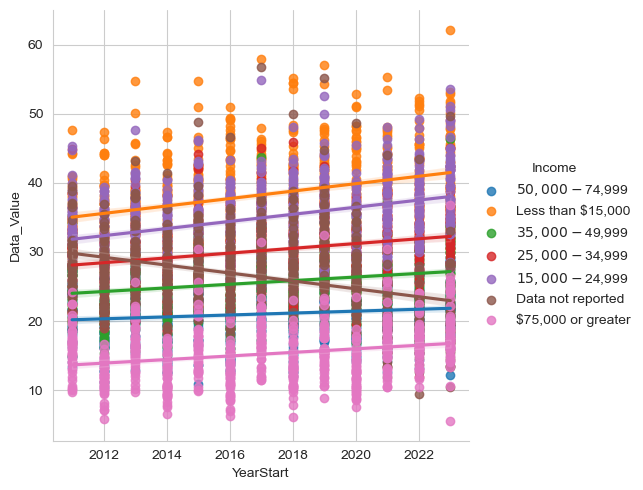

In [66]:
# setting up for plot
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))


sns.lmplot(data=test, x="YearStart", y="Data_Value", hue="Income")
plt.show()